<a href="https://colab.research.google.com/github/duchaba/Norwegian_Blue_Parrot_k2fa_AI/blob/master/Piggy_Official_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Project Piggy Time Series

Helpful links:

- https://forums.fast.ai/t/time-series-sequential-data-study-group/29686/900

- https://github.com/timeseriesAI/tsai

In [ ]:
#@title Pretty Up (JS)

# OPTIONAL 
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%javascript
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #28a745 !important;border-radius: 10px 4px 4px 10px;padding: 1em 2em;background-color: rgba(30,30,40,0.15);}";
// css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;font-size:2.5em !important;}";
css = css + " hr{border-color: hotpink; border-style: solid;} ";
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:150%;} h3{color:#fd7e14 !important;} h4{color:#007bff !important;}";
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));
console.log("color updated");

# 2.0 Set Up

In [1]:
#@title FastAI Install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 8.3 MB/s 
     |████████████████████████████████| 186 kB 49.7 MB/s 
     |████████████████████████████████| 1.2 MB 72.7 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 354 kB/s 
Mounted at /content/gdrive


In [2]:
#@title TSai Install (RESET RUNTIME)
## NOTE: UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI
stable = True # True: stable version in pip, False: latest version from github
if stable: 
    !pip install tsai  
else:      
    !pip install git+https://github.com/timeseriesAI/tsai.git 
## NOTE: REMEMBER TO RESTART (NOT RECONNECT/ RESET) THE KERNEL/ RUNTIME ONCE THE INSTALLATION IS FINISHED

     |████████████████████████████████| 180 kB 9.7 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 189 kB 89.4 MB/s 
     |████████████████████████████████| 23.1 MB 1.3 MB/s 
     |████████████████████████████████| 5.9 MB 24.3 MB/s 
     |████████████████████████████████| 72 kB 1.3 MB/s 
     |████████████████████████████████| 3.4 MB 69.0 MB/s 
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
     |████████████████████████████████| 2.5 MB 78.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 74.3 MB/s 
     |████████████████████████████████| 786 kB 81.5 MB/s 
     |████████████████████████████████| 1.1 MB 66.8 MB/s 
     |████████████████████████████████| 113 kB 92.7 MB/s 
     |████████████████████████████████| 125 kB 93.6 MB/s 
     |████████████████████████████████| 779 kB 76.8 MB/s 
     |████████████████████████████████| 778 kB 76.2 MB/s 
     |█████████████

In [4]:
#@title Initiaize TSai after RESTART Runtime
from tsai.all import *
#computer_setup()
#tsai.imports.my_setup()
tsai.utils.my_setup()

os             : Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.12
tsai           : 0.2.22
fastai         : 2.5.2
fastcore       : 1.3.26
torch          : 1.9.0+cu111
n_cpus         : 4
device         : cuda (Tesla P100-PCIE-16GB)


In [5]:
#@title Setup ... *little piggy* ...
#
# create class
class D0HZ(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    #
    # color pallete
    self.color_primary = "#ff7900"
    self.color_secondary = "#00c6d7"
    self.color_success = "#cf0072"
    self.color_warning = "#d9e506"
    self.color_base = "#830051"
    self.color_hold = "#766a65"
    self.color_gray80 = "#343a40"
    self.color_gray70 = "#495057"
    self.color_gray40 = "#ced4da"
    self.color_gray20 = "#e9ecef"
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  # 
  # dance
  def dance_happy(self):
    char = "        _=,_\n    o_/6 /#\\\n    \\__ |##/\n     ='|--\\\n       /   #'-.\n"
    char = char + "       \\#|_   _'-. /\n        |/ \\_( # |\" \n       C/ ,--___/\n"
    print(char)
    self._ph()
    self._pp(self.name, "is ready to rock and roll.")
    self._ph()
    return
  # 
  # draw black sheep
  def draw_black_sheep(self):
    c = "\n_________________       _       _       _       _       _       _       _ \n"
    c = c + "______________-(_)-  _-(_)-  _-(_)-  _-(\")-  _-(_)-  _-(_)-  _-(_)-  _-(_)- \n"
    c = c + "___________`(___)  `(___)  `(___)  `(###)  `(___)  `(___)  `(___)  `(___) \n"
    c = c + "____________// \\\\   // \\\\   // \\\\   // \\\\   // \\\\   // \\\\   // \\\\   // \\\\ \n" 
    print(c) 
    self._ph()
    self._pp("bye'aaa", "bye'aaa")
    return
# ---end of D0HZ class
#
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator
  #
  # 
  # draw graph using graphvix.org
@add_method(D0HZ)
def _draw_graph_viz(self,graph,label,direction="LR",arrow_head="normal",bgcolor="#dee2e6", 
  edge_color="#6c757d",default_shape="oval",font_color="#343a40", is_filled=True,
  fill_color="#d9e506",label_color="#17a2b8",graph_size="",node_font_size=14.0,engine="dot",
  ranksep="0.5"):
  # 
  # set up
  fill = ''
  if (is_filled):
    fill = ' style=filled color="#343a40" fillcolor="' + fill_color + '" '
  gsize =''
  if (graph_size != ""):
    gsize = ' size="' + str(graph_size) + '" '
  x = 'digraph G{'
  x += 'label="' + label + '" '
  x += 'rankdir="' + direction + '" '
  x += 'layout="' + engine + '" '
  #
  x += 'node [ fontname="Arial" '
  x += fill
  x += 'shape=' + default_shape + ' '
  x += 'fontcolor="' + font_color + '" '
  x += 'fontsize=' + str(node_font_size) + ' '  
  x += ' ] '
  #
  x += 'graph [pad=0.4 fontsize=20 fontcolor="' + label_color + '" ' + gsize + ' '
  x += 'bgcolor="' + bgcolor + '" '
  x += 'ranksep="' + ranksep + '" '
  x += ' ] '
  #
  x += 'edge ['
  x += 'arrowhead=' + arrow_head + ' '
  x += 'color="' + edge_color + '" '
  x += ' ] '
  #
  x += graph
  x += ' }'
  display(graphviz.Source(x))
  return 
#
#
# draw the journey
@add_method(D0HZ)
def draw_journey(self):
  x = '"Eggna\nHome"[shape=circle style=filled fontcolor="#ffffff" fillcolor="' + self.color_primary + '" ] '
  x += '"1.\nBaseline"[shape=circle style=filled fillcolor="' + self.color_warning + '" ] '
  x += '"2.\nLabeled Data"[shape=circle style=filled fillcolor="' + self.color_warning + '" ] '
  x += '"3.\nKnown Biases"[shape=circle style=filled fillcolor="' + self.color_warning + '" ] '
  x += '"Eggna\nHome"->"1.\nBaseline"->"2.\nLabeled Data"->"3.\nKnown Biases"; '
  x += '"3.\nKnown Biases"->"Wrap up"->"Eggna\nHome"[constraint=false, style="dashed" arrowhead="dot"] '
  #
  self._draw_graph_viz(x,"Figure-1, A1SH Process, Successful AI Project First 3 Definitively Steps",default_shape="circle",bgcolor="#ffffff")
  return
#
# That's it.
#
# Let start by spawing "Piggy"
piggy = D0HZ("Piggy")
#
piggy.dance_happy()

---------------------------------------- : ----------------------------------------
                              Hello from : D0HZ
                               Code name : Piggy
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------
        _=,_
    o_/6 /#\
    \__ |##/
     ='|--\
       /   #'-.
       \#|_   _'-. /
        |/ \_( # |" 
       C/ ,--___/

---------------------------------------- : ----------------------------------------
                                   Piggy : is ready to rock and roll.
---------------------------------------- : ----------------------------------------


In [6]:
#@title System, GPU, and CPU Info
#
import torch
import pynvml
import gc
import psutil
@add_method(D0HZ)
def fetch_gpu_info(self):
  gpu_total = gpu_free = cpu_free = gc_free = 0
  try:
    gc_free = gc.collect()
    torch.cuda.empty_cache()  # 
    val = psutil.virtual_memory()._asdict()
    cpu_free = round((val["available"] / (1024**3)), 2)
    # self.parent.bag.cpu_ram_free = cpu_free
    #
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    gpu_free = round(info.free / (1024**3), 2)
    # self.parent.bag.gpu_ram_free = gpu_free
    #
    gpu_total = round(info.total / (1024**3), 2)
  except:
    self._ph()
    self._pp("**Error", "NO GPU accelerator")
    self._pp("Suggest recovery", "Menu > Runtime > Change Runtime Type > {select} GPU accelerator")
  return gpu_total, gpu_free, cpu_free, gc_free
#
#
@add_method(D0HZ)
def say_gpu_info(self):
  gpu_total, gpu_free, cpu_free, gc_free = self.fetch_gpu_info()
  self._ph()
  print("%40s : %6.2f GB" % ("Total GPU RAM", gpu_total))
  print("%40s : %6.2f GB" % ("Free GPU RAM", gpu_free))
  print("%40s : %6.2f GB" % ("Free CPU RAM", cpu_free))
  print("%40s : %6.2f" % ("Garbage collection recovered", gc_free))
  self._ph()
  return
#
#
import datetime
import sys
import fastai
import psutil
#
@add_method(D0HZ)
def say_sys_info(self):
  self._ph()
  now = datetime.datetime.now()
  self._pp("System time", now.strftime("%Y/%m/%d %H:%M"))
  self._pp("Platform", sys.platform)
  #self.parent.bag.platform = sys.platform
  self._pp("Python version", sys.version)
  #self.parent.bag.python_version = sys.version
  self._pp("PyTorch version", torch.__version__)
  #self.parent.bag.pytorch_version = torch.__version__
  self._pp("Fastai version is: ", fastai.__version__)
  #self.parent.bag.fastai_version = fastai.__version__
  # self._pp("Monty version", self.parent.__version__)
  val = psutil.cpu_count()
  self._pp("CPU count", val)
  #self.parent.bag.cpu_count = val
  val = psutil.cpu_freq()
  if (None != val):
    val = val._asdict()
    self._pp("CPU speed", (str(round((val["current"] / 1000), 2)) + " GHz"))
    self._pp("CPU max speed", (str(round((val["max"] / 1000), 2)) + " GHz"))
    #self.parent.bag.cpu_max_ghz = round((val["max"] / 1000), 2)
  else:
    self._pp("*CPU speed", "NOT available")
  return
#
piggy.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  15.65 GB
                            Free CPU RAM :  23.92 GB
            Garbage collection recovered : 154989.00
---------------------------------------- : ----------------------------------------


In [ ]:
#@title Handsake Kaggle
#
import pathlib
@add_method(D0HZ)
def handsake_kaggle(self):
  creds = '{"username":"duchaba","key":"ba7f62b06b8afe7fcb794d9f07c7a3fa"}'
  cred_path = pathlib.Path('~/.kaggle/kaggle.json').expanduser()
  if not cred_path.exists():
      cred_path.parent.mkdir(exist_ok=True)
      cred_path.write_text(creds)
      cred_path.chmod(0o600)
  self._ph()
  self._pp("Handsake with Kaggle", creds)
  self._ph()
  return
#
piggy.handsake_kaggle()
import kaggle

# 3.0 Fetch (and Create) Time Series Data

In [24]:
import pandas
@add_method(D0HZ)
def fetch_mega(self,f="gdrive/MyDrive/Private/maga-lotto-oct-9-2021.csv"):
  self._ph()
  self._pp("Mega Data", f)
  df = pandas.read_csv(a,header=None)
  display(df.head())
  self._pp("The Tail", "Happy coding :-) ")
  display(df.tail(3))
  self._ph()
  return df

In [25]:
piggy.dfmega = piggy.fetch_mega()

---------------------------------------- : ----------------------------------------
                               Mega Data : gdrive/MyDrive/Private/maga-lotto-oct-9-2021.csv


,0,1,2,3,4,5
0,21,24,36,40,70,22
1,7,11,18,30,36,4
2,21,25,36,62,63,6
3,18,30,43,68,69,22
4,17,21,27,43,56,15


                                The Tail : Happy coding :-) 


,0,1,2,3,4,5
1643,7,27,32,37,38,30
1644,8,11,28,37,53,12
1645,15,19,20,32,38,21


---------------------------------------- : ----------------------------------------


In [38]:
piggy.dfmega[0][:10]

0    21
1     7
2    21
3    18
4    17
5    36
6    17
7     4
8    20
9    15
Name: 0, dtype: int64

In [109]:
import matplotlib
@add_method(D0HZ)
def draw_mega(self,col=0,limit=None):
  if limit is None:
    d = self.dfmega[col]
  else:
    d = self.dfmega[col][-limit:]
  a = d.mean()
  s = d.std()
  u = a + s
  l = a - s
  matplotlib.pyplot.figure(figsize=(24,4))
  matplotlib.pyplot.title("Mega Number: "+str(col) + ", Mean(pink): " + str(round(a,4)) 
    + ", STD(gold): " + str(round(s,4)) + ", STD-bound(green): " + str(round(l,4)) + " : " + str(round(u,4)) )
  matplotlib.pyplot.plot(d,c="deepskyblue")
  matplotlib.pyplot.xlabel("Time Series")
  matplotlib.pyplot.ylabel("Mega Number")
  matplotlib.pyplot.axhline(y=a,color="hotpink")
  matplotlib.pyplot.axhline(y=s,color="gold")
  matplotlib.pyplot.axhline(y=u,color="lightgreen")
  matplotlib.pyplot.axhline(y=l,color="lightgreen")
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()
  return

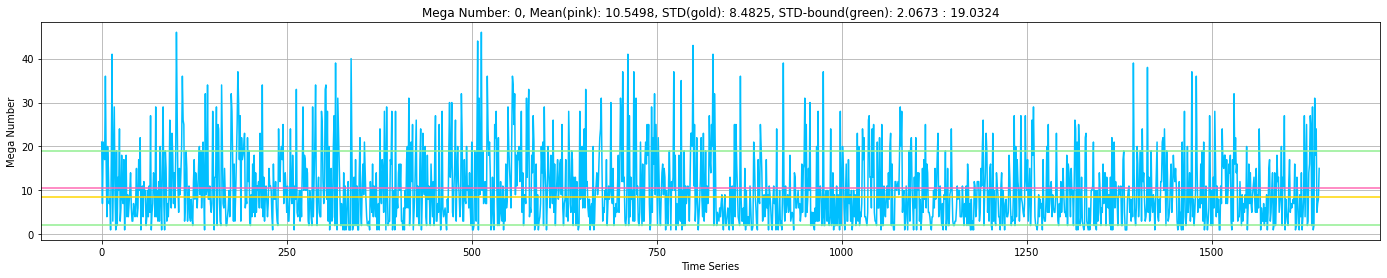

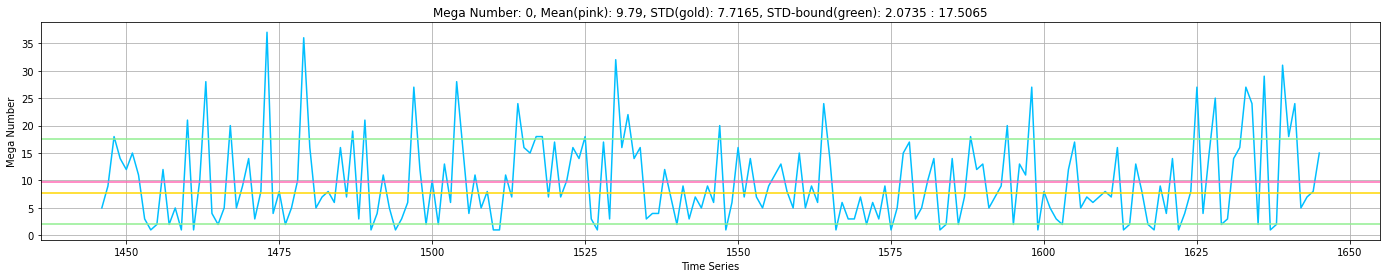

In [110]:
piggy.draw_mega(col=0)
piggy.draw_mega(col=0,limit=200)

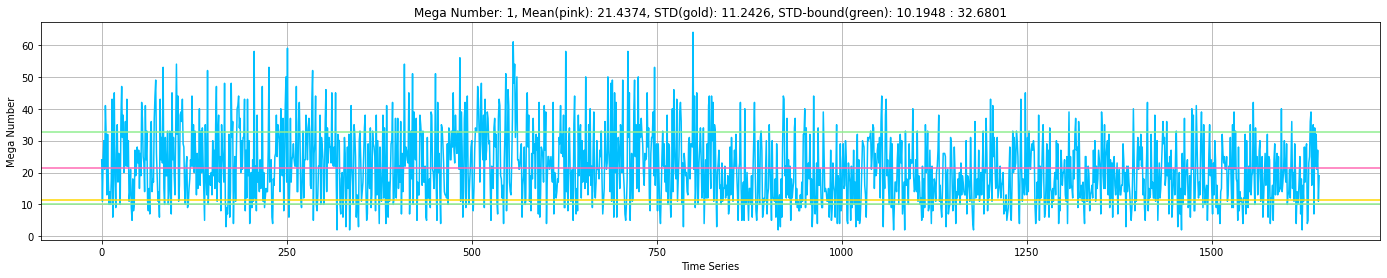

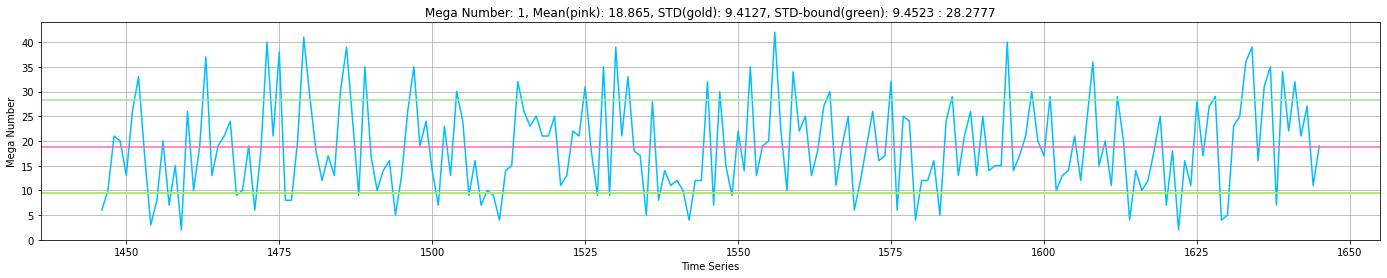

In [111]:
piggy.draw_mega(col=1)
piggy.draw_mega(col=1,limit=200)

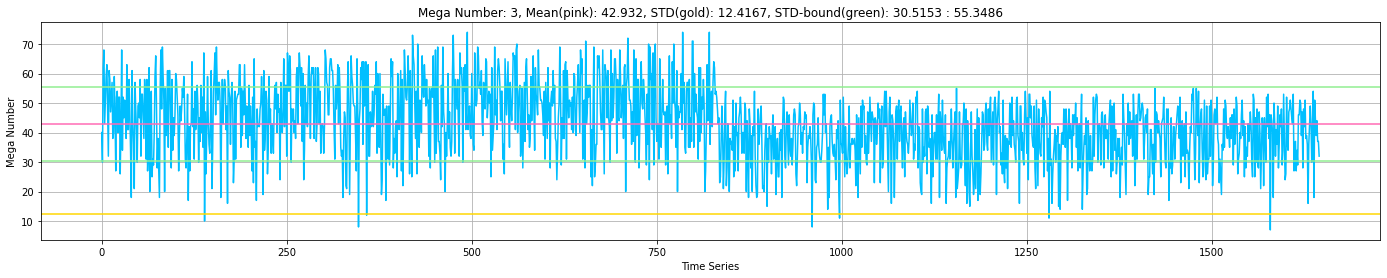

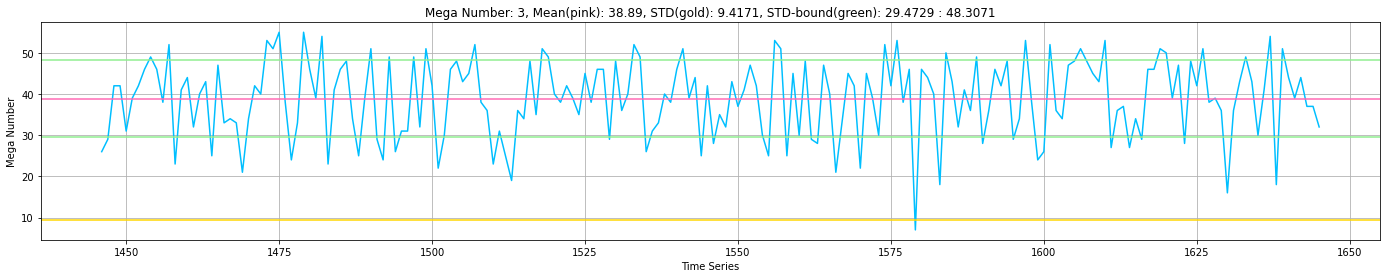

In [112]:
piggy.draw_mega(col=3)
piggy.draw_mega(col=3,limit=200)

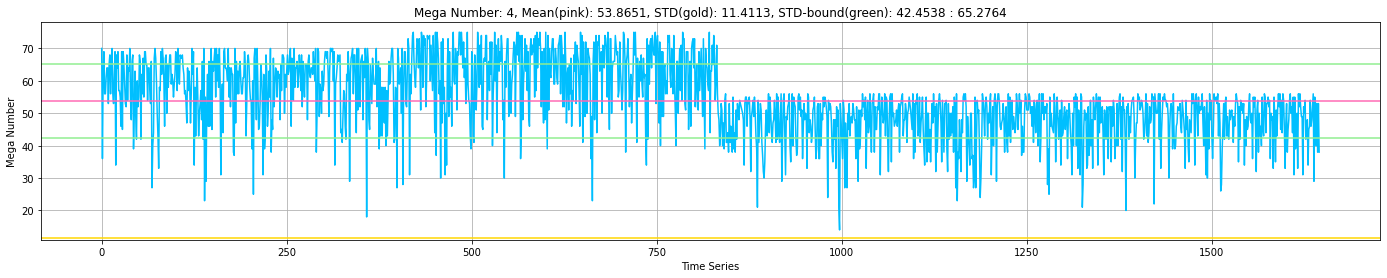

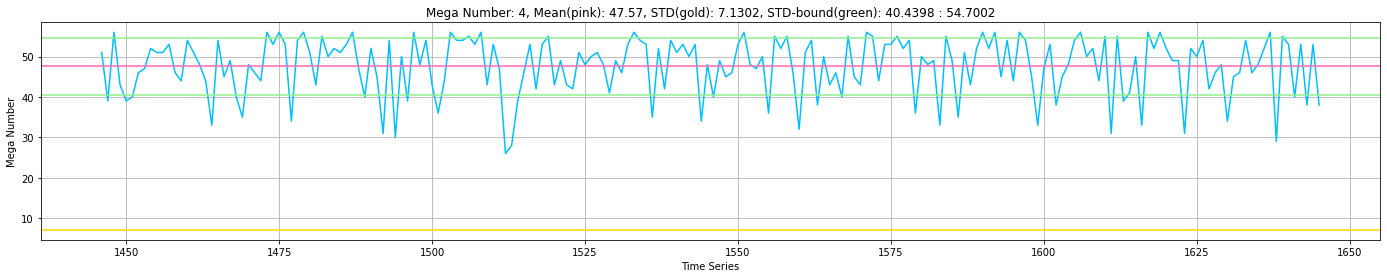

In [113]:
piggy.draw_mega(col=4)
piggy.draw_mega(col=4,limit=200)

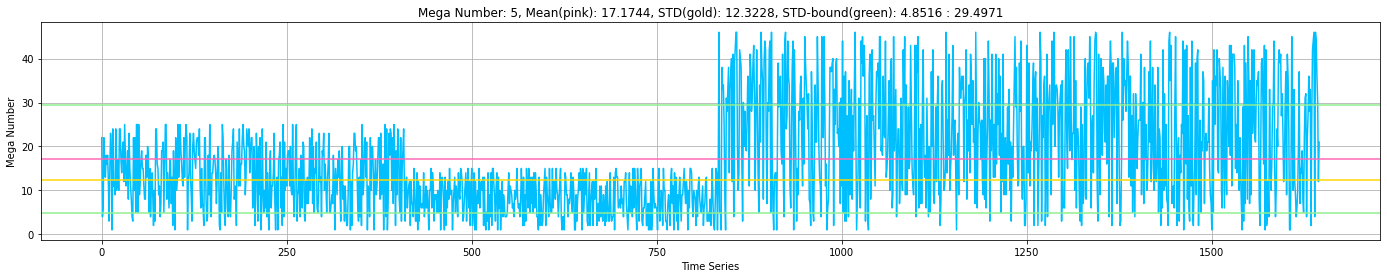

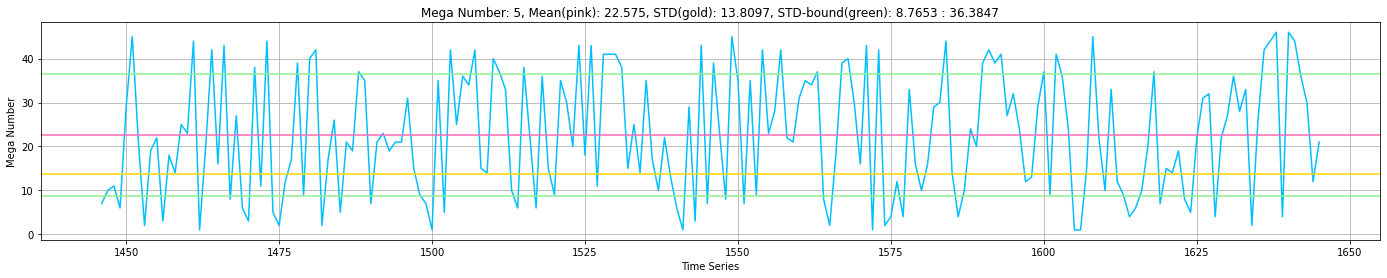

In [114]:
piggy.draw_mega(col=5)
piggy.draw_mega(col=5,limit=200)

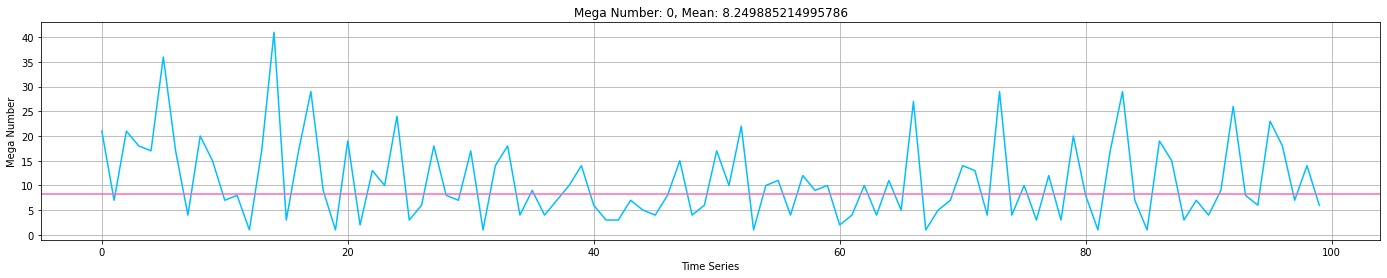

In [66]:
matplotlib.pyplot.figure(figsize=(24,4))
a = piggy.dfmega[0][:100].std()
matplotlib.pyplot.title("Mega Number: "+str(0) + ", Mean: " + str(a))
matplotlib.pyplot.plot(piggy.dfmega[0][:100],c="deepskyblue")
matplotlib.pyplot.xlabel("Time Series")
matplotlib.pyplot.ylabel("Mega Number")
matplotlib.pyplot.axhline(y=a,color="hotpink")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

## 3.1 Create Time Series for Testing

In [ ]:
@add_method(D0HZ)
def fetch_raw_ts_array(self,row=34,col=6,start=0,is_log=False):
  t = np.ones((row,col), dtype=float)
  for i in range(row):
    k = (i * col) + start
    t[i] = np.arange(k,k+col)
  if is_log:
    t = np.log(t)
  return t

In [ ]:
@add_method(D0HZ)
def fetch_baseline_ts_data(self,wlength=8,stride=1,horizon=1,row=4,col=6,start=2,is_log=False):
  t = self.fetch_raw_ts_array(row=row*col,col=col,start=start,is_log=is_log)
  # t = fetch_data(r*n_vars,n_vars,2)
  # print(t.shape)
  # plt.plot(t) 
  # plt.show()
  x, y = tsai.data.preparation.SlidingWindow(window_len=wlength, stride=stride)(t)
  return x,y,t

In [ ]:
x, y, t = piggy.fetch_baseline_ts_data(row=1597, wlength=377,is_log=True)

In [ ]:
import pandas
dft = pandas.DataFrame(t)
display(dft.head(10))
display(dft.tail(2))

,0,1,2,3,4,5
0,0.693147,1.098612,1.386294,1.609438,1.791759,1.945910
1,2.079442,2.197225,2.302585,2.397895,2.484907,2.564949
2,2.639057,2.708050,2.772589,2.833213,2.890372,2.944439
3,2.995732,3.044522,3.091042,3.135494,3.178054,3.218876
4,3.258097,3.295837,3.332205,3.367296,3.401197,3.433987
5,3.465736,3.496508,3.526361,3.555348,3.583519,3.610918
6,3.637586,3.663562,3.688879,3.713572,3.737670,3.761200
7,3.784190,3.806662,3.828641,3.850148,3.871201,3.891820
8,3.912023,3.931826,3.951244,3.970292,3.988984,4.007333
9,4.025352,4.043051,4.060443,4.077537,4.094345,4.110874


,0,1,2,3,4,5
9580,10.959227,10.959245,10.959262,10.959279,10.959297,10.959314
9581,10.959332,10.959349,10.959366,10.959384,10.959401,10.959418


In [ ]:
x.shape

(9205, 6, 377)

In [ ]:
# x

In [ ]:
xlast = x[-1:,:,:]
xlast

array([[[10.91918914, 10.91929777, 10.9194064 , ..., 10.95901835,
         10.95912275, 10.95922713],
        [10.91920724, 10.91931588, 10.9194245 , ..., 10.95903575,
         10.95914015, 10.95924453],
        [10.91922535, 10.91933398, 10.91944261, ..., 10.95905315,
         10.95915754, 10.95926193],
        [10.91924346, 10.91935209, 10.91946071, ..., 10.95907055,
         10.95917494, 10.95927932],
        [10.91926156, 10.91937019, 10.91947881, ..., 10.95908795,
         10.95919234, 10.95929672],
        [10.91927967, 10.9193883 , 10.91949691, ..., 10.95910535,
         10.95920974, 10.95931411]]])

In [ ]:
y.shape

(9205, 6)

In [ ]:
ylast = y[-1:,:]
ylast

array([[10.95933151, 10.9593489 , 10.9593663 , 10.95938369, 10.95940109,
        10.95941848]])

In [ ]:
#d,e=t.shape
#(24,6)
#y
rawlast = t[-1:,:][0]
ypred1 = numpy.ones((1,rawlast.size), dtype=float)
ypred1[0] = rawlast
ypred1

array([[10.95933151, 10.9593489 , 10.9593663 , 10.95938369, 10.95940109,
        10.95941848]])

In [ ]:
xpred1 = xlast.copy()
#(1,6,8)
xpred1

array([[[10.91918914, 10.91929777, 10.9194064 , ..., 10.95901835,
         10.95912275, 10.95922713],
        [10.91920724, 10.91931588, 10.9194245 , ..., 10.95903575,
         10.95914015, 10.95924453],
        [10.91922535, 10.91933398, 10.91944261, ..., 10.95905315,
         10.95915754, 10.95926193],
        [10.91924346, 10.91935209, 10.91946071, ..., 10.95907055,
         10.95917494, 10.95927932],
        [10.91926156, 10.91937019, 10.91947881, ..., 10.95908795,
         10.95919234, 10.95929672],
        [10.91927967, 10.9193883 , 10.91949691, ..., 10.95910535,
         10.95920974, 10.95931411]]])

In [ ]:
a,b,c=xpred1.shape
for i in range(c-1):
  xpred1[0,:,i] = xpred1[0,:,i+1]
xpred1[a-1,:,c-1] = rawlast
xpred1

array([[[10.91929777, 10.9194064 , 10.91951502, ..., 10.95912275,
         10.95922713, 10.95933151],
        [10.91931588, 10.9194245 , 10.91953312, ..., 10.95914015,
         10.95924453, 10.9593489 ],
        [10.91933398, 10.91944261, 10.91955122, ..., 10.95915754,
         10.95926193, 10.9593663 ],
        [10.91935209, 10.91946071, 10.91956932, ..., 10.95917494,
         10.95927932, 10.95938369],
        [10.91937019, 10.91947881, 10.91958742, ..., 10.95919234,
         10.95929672, 10.95940109],
        [10.9193883 , 10.91949691, 10.91960552, ..., 10.95920974,
         10.95931411, 10.95941848]]])

In [ ]:
dfy = pandas.DataFrame(y)
display(dfy.head())
display(dfy.tail(2))

,0,1,2,3,4,5
0,7.724888,7.725330,7.725771,7.726213,7.726654,7.727094
1,7.727535,7.727976,7.728416,7.728856,7.729296,7.729735
2,7.730175,7.730614,7.731053,7.731492,7.731931,7.732369
3,7.732808,7.733246,7.733684,7.734121,7.734559,7.734996
4,7.735433,7.735870,7.736307,7.736744,7.737180,7.737616


,0,1,2,3,4,5
9203,10.959227,10.959245,10.959262,10.959279,10.959297,10.959314
9204,10.959332,10.959349,10.959366,10.959384,10.959401,10.959418


# Dataload and Train

In [ ]:
# tfms  = [None, [TSRegression()]]
# batch_tfms = TSStandardize(by_sample=True, by_var=True)
# dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
# learn = ts_learner(dls, InceptionTime, metrics=[mae, rmse], cbs=ShowGraph())
# learn.fit_one_cycle(50, 1e-2)

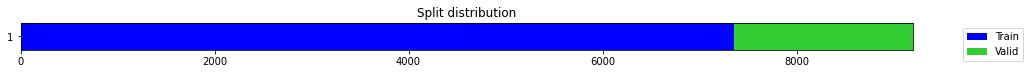

In [ ]:
spt = tsai.data.validation.get_splits(y,shuffle=False)

In [ ]:
# import torch
# xt = torch.tensor(x)
# yt = torch.tensor(y)
# xt = tensorflow.convert_to_tensor(x)
# yt = tensorflow.convert_to_tensor(y)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
import fastai
import numpy
tfms  = [None, [TSRegression()]]

In [ ]:
batch_tfms = TSStandardize(by_sample=True, by_var=True)

In [ ]:
dls = get_ts_dls(x, y, splits=spt, tfms=tfms, batch_tfms=batch_tfms)

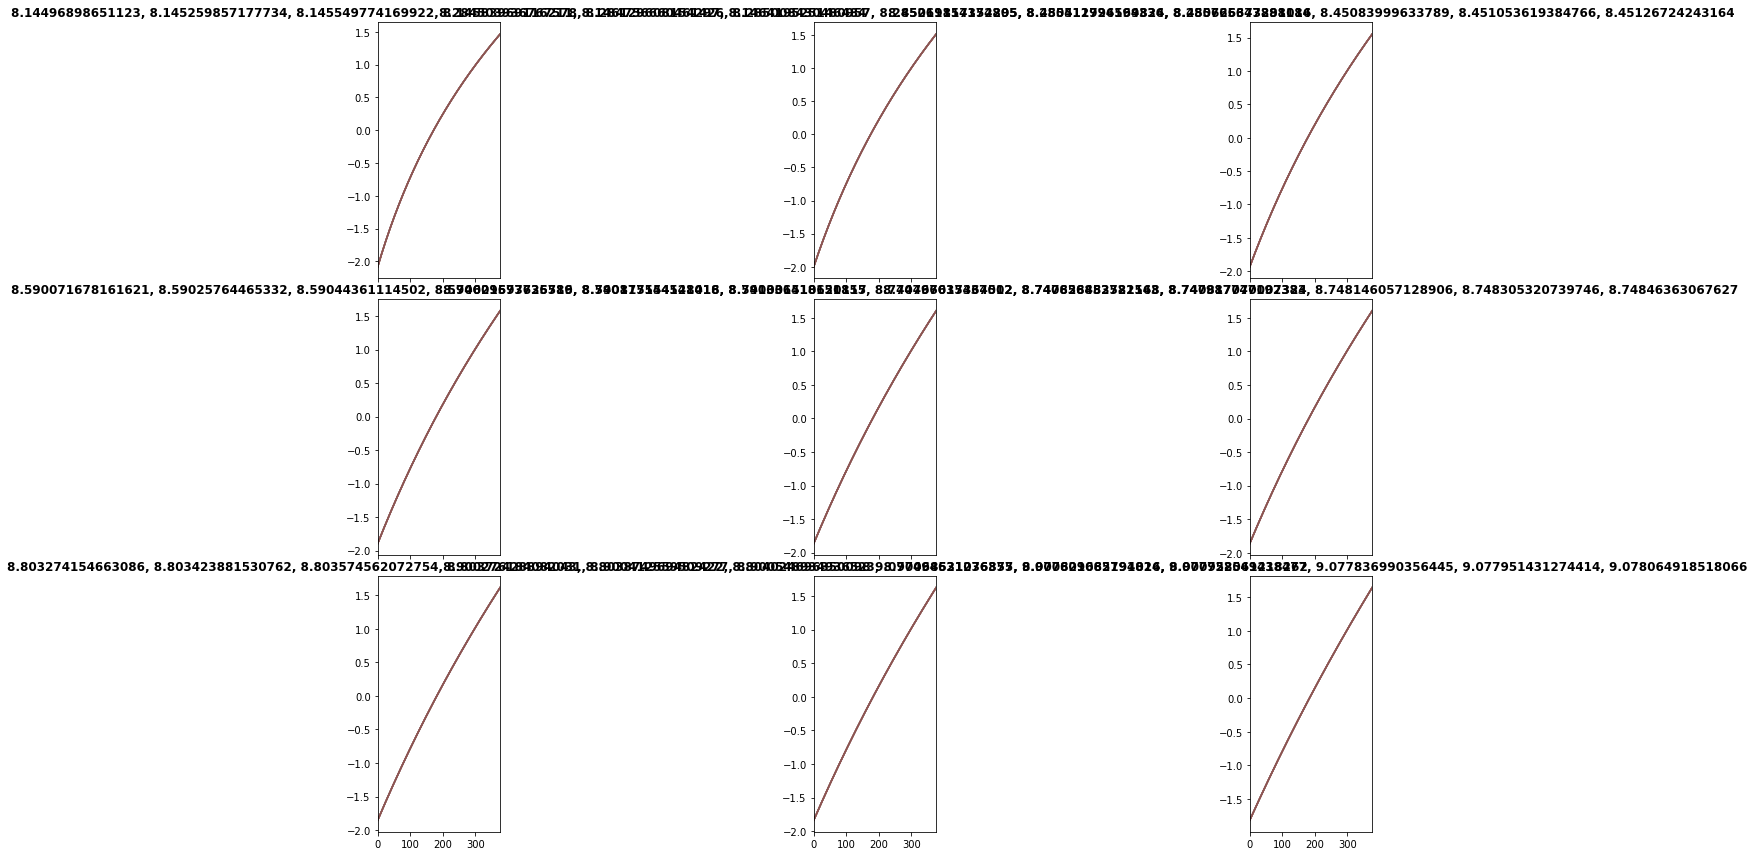

In [ ]:
dls.show_batch()

In [ ]:
learn = ts_learner(dls, InceptionTime, metrics=[mae, rmse], cbs=ShowGraph())

SuggestedLRs(valley=0.0020892962347716093)

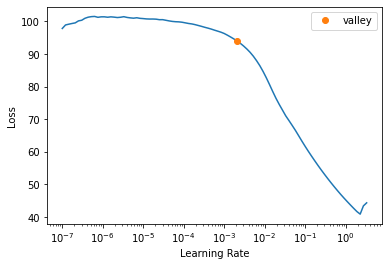

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,78.235847,86.845680,9.312114,9.319103,00:04
1,55.381172,50.543690,7.097959,7.109409,00:04
2,22.305145,13.335258,3.627777,3.651747,00:04
3,2.991202,10.539929,3.245453,3.246526,00:04
4,0.317687,4.395032,2.095298,2.096433,00:04
5,0.067184,75.904480,8.708389,8.712318,00:04
6,0.067150,207.886993,14.411811,14.418286,00:04
7,0.033630,16.244505,4.029213,4.030447,00:04
8,0.038969,1.028696,1.009613,1.014246,00:04
9,0.022205,6.022659,2.452747,2.454111,00:04


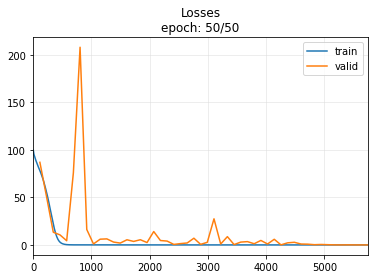

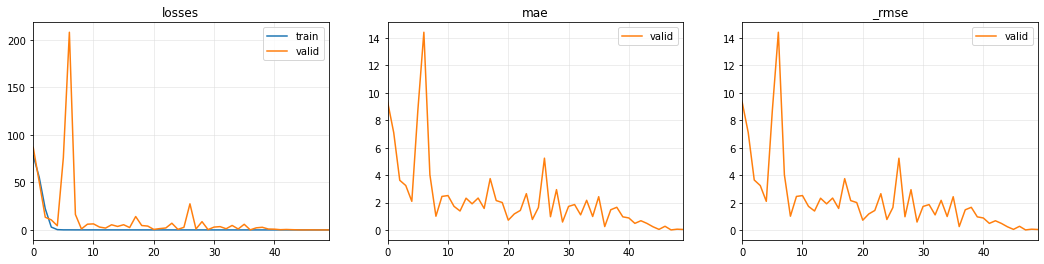

In [ ]:
learn.fit_one_cycle(50, 2e-3)

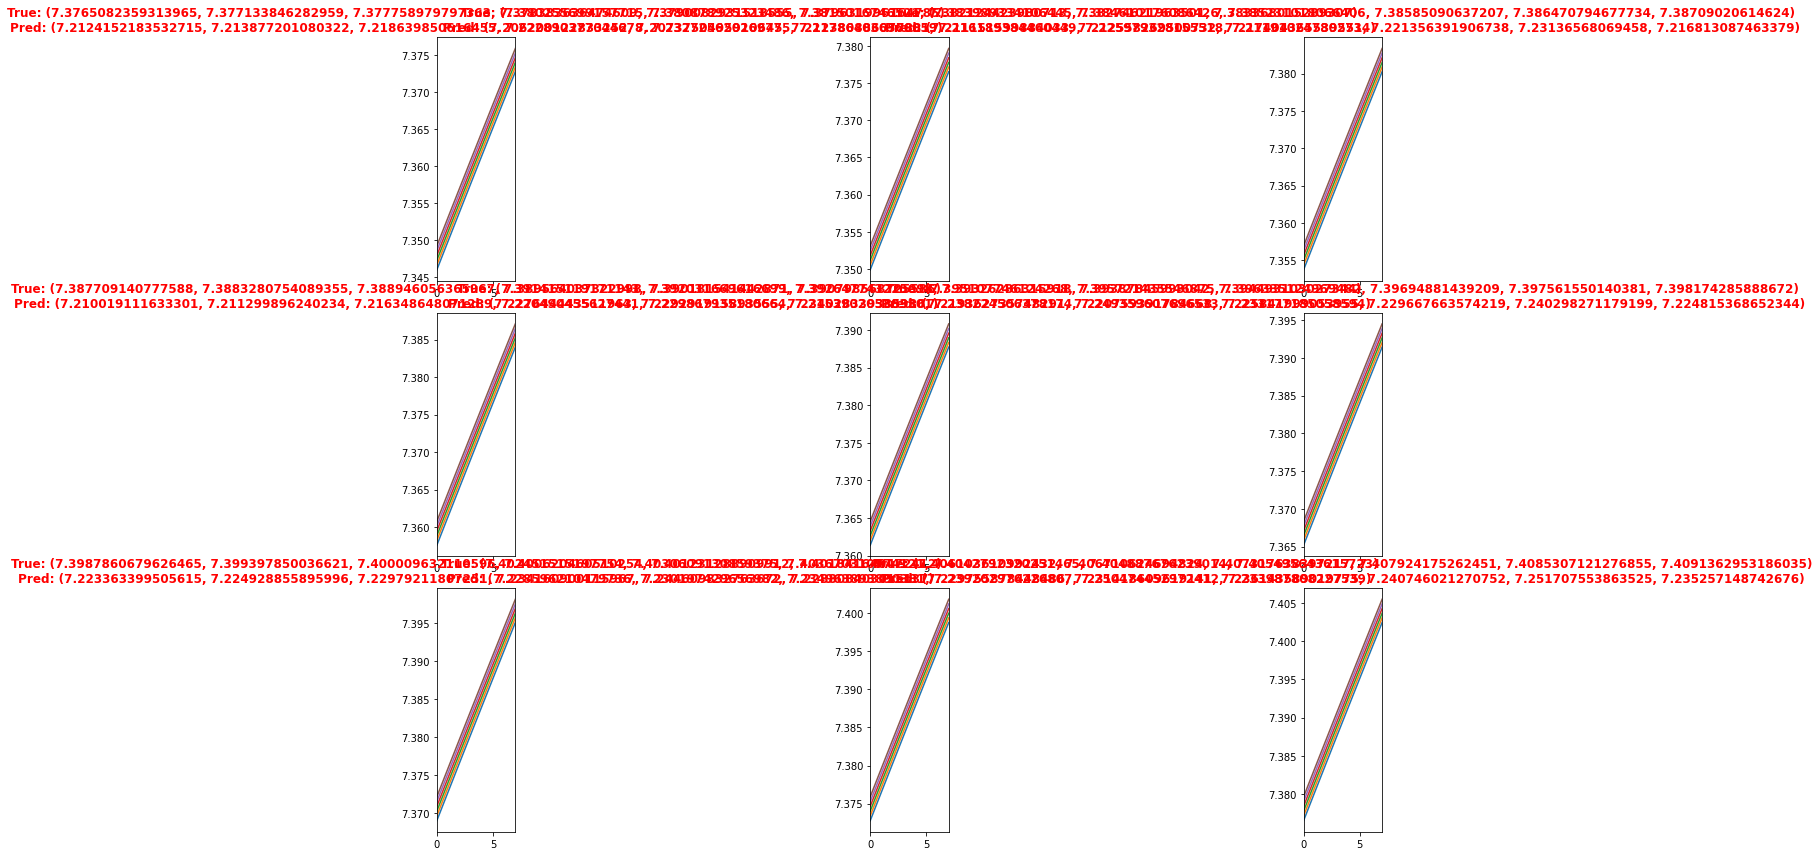

In [ ]:
learn.show_results()

In [ ]:
# Labeled test data
# test_ds = valid_dl.dataset.add_test(X, y)# In this case I'll use X and y, but this would be your test data
# test_dl = valid_dl.new(test_ds)
# test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
# test_probas, test_targets, test_preds

In [ ]:
dls.valid

In [ ]:
test_ds = dls.valid.dataset.add_test(xlast, ylast)

In [ ]:
test_dl = dls.valid.new(test_ds)

In [ ]:
test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)

In [ ]:
ylast

array([[10.95933151, 10.9593489 , 10.9593663 , 10.95938369, 10.95940109,
        10.95941848]])

In [ ]:
test_preds

tensor([[930.9017, 911.3037, 950.3838, 935.4242, 909.6072, 956.5516]])

In [ ]:
test_targets

tensor([[10.9593, 10.9593, 10.9594, 10.9594, 10.9594, 10.9594]])

In [ ]:
test_probas

tensor([[10.8219, 10.8147, 10.8214, 10.8133, 10.8154, 10.8139]])

In [ ]:
p1 = numpy.exp(ylast)
p1

array([[57488., 57489., 57490., 57491., 57492., 57493.]])

In [ ]:
p2 = numpy.exp(test_preds)
p2

tensor([[50108.5117, 49744.4531, 50080.9414, 49677.3750, 49779.7188, 49707.7969]])

In [ ]:
#
#
#

In [ ]:
test_ds = dls.valid.dataset.add_test(xpred1, ypred1)
test_dl = dls.valid.new(test_ds)
test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)

In [ ]:
print(test_preds)
print(ypred1)
print(numpy.exp(test_preds))
print(numpy.exp(ypred1))

tensor([[10.8948, 10.8834, 10.8915, 10.8857, 10.8914, 10.8829]])
[[10.95933151 10.9593489  10.9593663  10.95938369 10.95940109 10.95941848]]
tensor([[53896.9805, 53285.7773, 53719.5820, 53406.1953, 53710.7188, 53260.3750]])
[[57488. 57489. 57490. 57491. 57492. 57493.]]


In [ ]:
del learn
del dls
piggy.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  14.91 GB
                            Free CPU RAM :  22.64 GB
            Garbage collection recovered : 62287.00
---------------------------------------- : ----------------------------------------


In [ ]:
rawdata = "MON 05/31/21:10-14-16-27-38:SUN 05/30/21:01-04-09-27-33:SAT 05/29/21:01-07-29-33-39:FRI 05/28/21:03-08-11-28-34:THU 05/27/21:05-09-12-14-34:WED 05/26/21:08-10-16-20-35:TUE 05/25/21:10-11-14-20-39:MON 05/24/21:10-13-15-23-38:SUN 05/23/21:09-13-17-18-33:SAT 05/22/21:04-11-22-26-32:FRI 05/21/21:07-15-17-29-39:THU 05/20/21:01-02-09-17-35:WED 05/19/21:07-17-25-29-38:TUE 05/18/21:04-09-14-25-39:MON 05/17/21:08-18-22-23-31:SUN 05/16/21:15-20-22-29-36:SAT 05/15/21:01-16-23-29-33:FRI 05/14/21:06-10-20-36-39:THU 05/13/21:13-19-21-28-29:WED 05/12/21:04-05-06-21-33:TUE 05/11/21:07-13-19-30-39:MON 05/10/21:02-04-07-08-18:SUN 05/09/21:02-12-22-24-36:SAT 05/08/21:21-26-31-32-36:FRI 05/07/21:07-09-15-21-27:THU 05/06/21:09-15-17-34-39:WED 05/05/21:07-15-21-28-31:TUE 05/04/21:08-13-19-23-39:MON 05/03/21:03-17-18-30-31:SUN 05/02/21:03-04-30-33-39:SAT 05/01/21:24-31-33-34-39:"

tsai.data.preprocessing.TSStandardize